## Author: Emad Abdalghaffar
### 2022 - Information Technology Institute (ITI)

### Problem: Gradient Descent optimization of the cost function (MSE) in Linear Regression problems

<br>Provided is the implementation of the gradient descent algorithm different variants:

- Batch/Vanilla GD $\;\;\;\;\;\;\;\;$ (Single Variable Function)
- Batch/Vanilla GD $\;\;\;\;\;\;\;\;$ (Multivariant Function)<br>
<br>
- Stochastic GD $\;\;\;\;\;\;\;\;\;\;\;$ (Single Variable Function)
- Mini Batch GD $\;\;\;\;\;\;\;\;\;\;\;$ (Single Variable Function)<br>
<br>
- Momentum-based GD $\;\;$ (Batch & Single Variable Function)
- NAG $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (Batch & Single)
<br>
- Adam GD $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (Batch & Multivariant Function)
- Adam GD $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (Mini Batch & Multivariant Function)


#### General structure for the provided codes:

In [1]:
# data

# optimization function (args; data, learning rate, number of max iterations)

    # initials
    
    # optimization loop
    
        # formulas of: hypothesis, loss and gradient
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        
        # variables update
        
        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        
    # outputs: optimum variables, plots and accuracy

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Batch/Vanilla Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (single variable function)

> theta0= 0.4651437695102402 
> theta1= 0.827297972036476
> the optimization process stopped after implementing number of iterations/updates = 84
> loss change stop-condition is satisfied


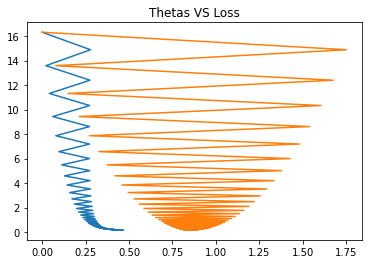

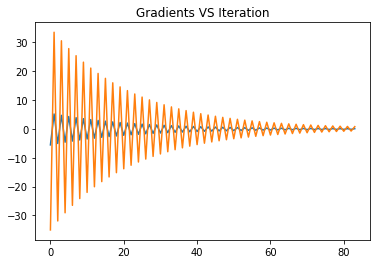

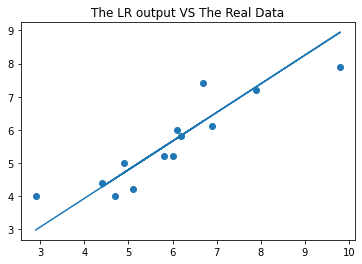

> The accuracy = 0.7702204305203258


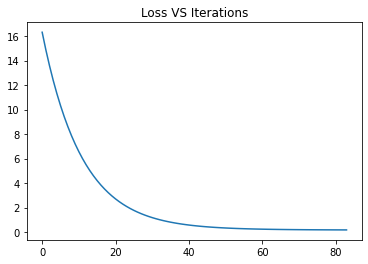

In [4]:
# Batch/Vanilla Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# single variable.


# data
data= np.genfromtxt("RegData.csv", delimiter= ",")
x= data[:,0]
y= data[:,1]
   
def GD(x, y, alpha, iterations):
    
    # initials
    theta0, theta1 = 0, 0
    m= len(x)
    thetas0, thetas1, loss, grth0, grth1= [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # batch looping to the optimum
    for i in range (iterations):
        
        # hypothesis, loss and gradient
        hypo_b= theta0 + theta1*x
        j= ((hypo_b-y).dot(hypo_b-y))/(2*m)
        gr_theta0= np.sum(hypo_b-y)/m
        gr_theta1= np.sum((hypo_b-y)*x)/m
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss.append(j)
        grth0.append(gr_theta0)
        grth1.append(gr_theta1)

        # variables updates
        theta0-= alpha*gr_theta0
        theta1-= alpha*gr_theta1

        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i >= 1:

            if np.absolute(loss[-1] - loss[-2]) < 0.001:  #in case the limit is set from 0.0001 to 0.001,the optimum is obtained
                                                           #in 84 iters instead of 206, but with accuracy 0.77 instead of 0.8
                flag="> loss change stop-condition is satisfied"
                break
                
            if np.linalg.norm([grth0[-1], grth1[-1]]) < (0.00000001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            thetaCurr= np.array([thetas0[-1], thetas1[-1]])
            thetaPrev= np.array([thetas0[-2], thetas1[-2]])
            if np.linalg.norm(thetaCurr - thetaPrev) < 0.000000001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0)
    plt.plot(grth1)
    plt.title("Gradients VS Iteration")
    plt.show()
    plt.scatter(x,y)
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2)
    
GD(x, y, 0.05, 1000)

#### Batch/Vanilla Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (multivariant function)

> The 4 thetas=
 [0.00813485] 
 [0.65607662] 
 [0.65958229] 
 [0.67747665]
> the optimization process stopped after implementing number of iterations/updates = 19
> loss change stop-condition is satisfied


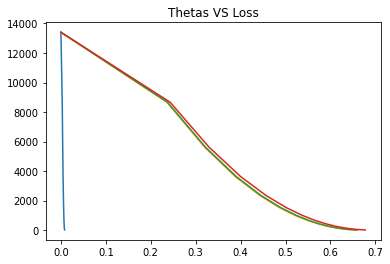

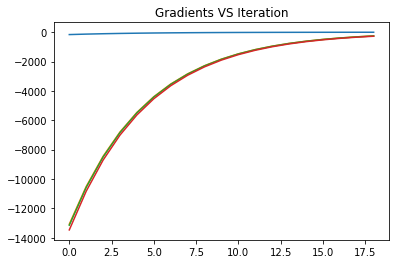

> The accuracy = 0.960110321993609 , considering the accuracy requirement is to be at least 95%


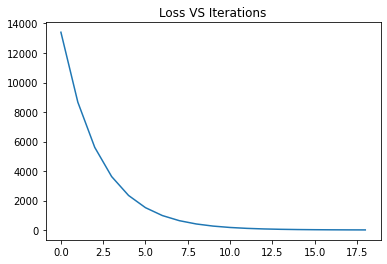

In [5]:
# Batch/Vanilla Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# multi variable.


# data
data= np.genfromtxt("MultipleLR.csv", delimiter= ",")
features= np.concatenate((np.ones((len(data), 1)), data[:,:-1]), axis=1)
target= data[:,-1].reshape(len(features), 1)

def GD_Mult(features, target, alpha, iterations):
    
    # initials
    m= len(features)
    thetas_List= np.zeros((features.shape[1], 1))
    thetas= np.zeros((features.shape[1], 1))
    loss= []
    flag="> no stop-condition is satisfied"

    # batch looping to the optimum
    for i in range (iterations):
        
        # hypothesis, loss and gradient
        hypo_b_Mult= features.dot(thetas_List)  #25x1 matrix
        j= (np.sum(np.multiply((hypo_b_Mult-target), (hypo_b_Mult-target))))/(2*m)
        gradients_List= ((features.T).dot(hypo_b_Mult-target))/m

        # variables updates
        thetas_List-= alpha*gradients_List
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        if i > 0:
            thetas= np.concatenate((thetas, thetas_List), axis=1)                
        loss.append(j)
        if i==0:
            gradients= gradients_List
        else:
            gradients= np.concatenate((gradients, gradients_List), axis=1)
        
        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i > 1:

            if np.absolute(loss[-1] - loss[-2]) < 3:  
                flag="> loss change stop-condition is satisfied"
                break
                
            if np.linalg.norm([gradients[:, -1]]) < (0.001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            if np.linalg.norm(thetas[:, -1] - thetas[:, -2]) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> The 4 thetas=\n", thetas_List[0], "\n", thetas_List[1], "\n", thetas_List[2], "\n", thetas_List[3])
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas[0,:], loss)
    plt.plot(thetas[1,:], loss)
    plt.plot(thetas[2,:], loss)
    plt.plot(thetas[3,:], loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(gradients[0,:])
    plt.plot(gradients[1,:])
    plt.plot(gradients[2,:])
    plt.plot(gradients[3,:])
    plt.title("Gradients VS Iteration")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(target, hypo_b_Mult)
    print("> The accuracy =", r2, ", considering the accuracy requirement is to be at least 95%")
    
GD_Mult(features, target, 0.00001, 1000)

#### Stochastic Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (single variable function)

> theta0= -0.23552791262153974 
> theta1= -1.9350033034757819
> the optimization process stopped after implementing number of iterations/updates = 50
> loss change stop-condition is satisfied


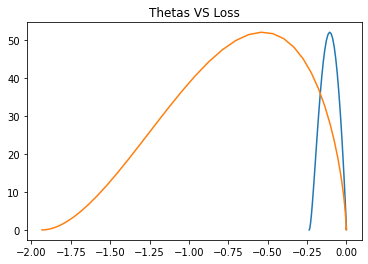

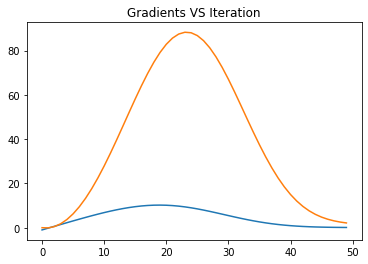

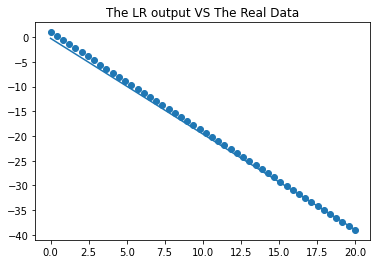

> The accuracy = 0.9964730927232207 , considering the accuracy requirement is to be at least 99%


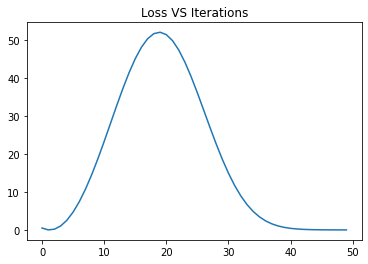

In [6]:
# Stochastic Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# single variable.


# data
x= np.linspace(0, 20)
y= -2*x + 1

def Stoch_GD(x, y, alpha, epochs):
    
    # initials
    theta0, theta1 = 0, 0
    thetas0, thetas1, loss, grth0, grth1= [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # stochastic looping to the optimum
    for j in range (epochs):
        
        for i in range (len(x)):
            
            # hypothesis, loss and gradient
            hypo_i= theta0 + theta1*x[i]
            j= ((hypo_i-y[i])**2)/2
            gr_theta0= hypo_i-y[i]
            gr_theta1= (hypo_i-y[i])*x[i]
            
            # documention of the gradual change in: variables (thetas), loss and gradients
            thetas0.append(theta0)
            thetas1.append(theta1)
            loss.append(j)
            grth0.append(gr_theta0)
            grth1.append(gr_theta1)
            
            # variables updates
            theta0-= alpha*gr_theta0
            theta1-= alpha*gr_theta1
            
        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i > 1:

            if np.absolute(loss[-1] - loss[-2]) < 0.01:
                flag="> loss change stop-condition is satisfied"
                break
            
            if np.linalg.norm([grth0[-1], grth1[-1]]) < (0.001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            thetaCurr= np.array([thetas0[-1], thetas1[-1]])
            thetaPrev= np.array([thetas0[-2], thetas1[-2]])
            if np.linalg.norm(thetaCurr - thetaPrev) < 0.001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0)
    plt.plot(grth1)
    plt.title("Gradients VS Iteration")
    plt.show()
    plt.scatter(x,y)
    hypo_b= theta0+theta1*x
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2, ", considering the accuracy requirement is to be at least 99%")
    
Stoch_GD(x, y, 0.001, 1)

#### Mini-Batch Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (single variable function)

> theta0= -0.16325976927851954 
> theta1= -1.8307496566304242
> the optimization process stopped after implementing number of iterations/updates = 45
> loss change stop-condition is satisfied


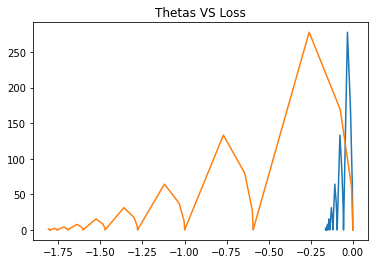

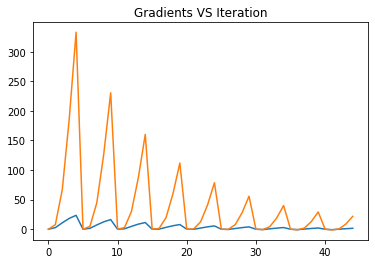

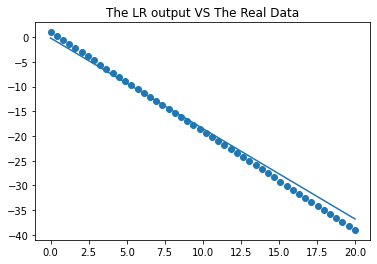

> The accuracy = 0.9908202209114432 , considering the accuracy requirement is to be at least 99%


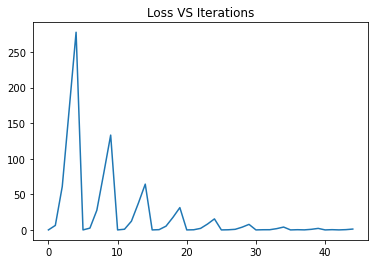

In [7]:
# Mini-Batch Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# single variable.


# data
x= np.linspace(0, 20)
y= -2*x + 1

def Stoch_GD(x, y, alpha, epochs, n): # n is the number of records per mini-batch
    
    # initials
    theta0, theta1 = 0, 0
    thetas0, thetas1, loss, grth0, grth1= [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # mini-batch looping to the optimum
    for j in range (epochs):
        
        for i in range (int(len(x)/n)):
            
            # hypothesis, loss and gradient
            hypo_mb= theta0 + theta1*x[((i-1)*n):(i*n)]
            j= ((hypo_mb-y[((i-1)*n):(i*n)]).dot(hypo_mb-y[((i-1)*n):(i*n)]))/(2*n)
            gr_theta0= np.sum(hypo_mb-y[((i-1)*n):(i*n)])/n
            gr_theta1= np.sum((hypo_mb-y[((i-1)*n):(i*n)])*x[((i-1)*n):(i*n)])/n
            
            # documention of the gradual change in: variables (thetas), loss and gradients
            thetas0.append(theta0)
            thetas1.append(theta1)
            loss.append(j)
            grth0.append(gr_theta0)
            grth1.append(gr_theta1)
            
            # variables updates
            theta0-= alpha*gr_theta0
            theta1-= alpha*gr_theta1
            
        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i > 1:

            if np.absolute(loss[-1] - loss[-2]) < 1:
                flag="> loss change stop-condition is satisfied"
                break
            
            if np.linalg.norm([grth0[-1], grth1[-1]]) < (0.001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            thetaCurr= np.array([thetas0[-1], thetas1[-1]])
            thetaPrev= np.array([thetas0[-2], thetas1[-2]])
            if np.linalg.norm(thetaCurr - thetaPrev) < 0.001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0)
    plt.plot(grth1)
    plt.title("Gradients VS Iteration")
    plt.show()
    plt.scatter(x,y)
    hypo_b= theta0+theta1*x
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2, ", considering the accuracy requirement is to be at least 99%")
    
Stoch_GD(x, y, 0.001, 1000, 10)

#### Batch/Vanilla Momentum-Based Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (single variable function)

> theta0= 0.6410383280024582 
> theta1= 0.8035208676799844
> the optimization process stopped after implementing number of iterations/updates = 76
> loss change stop-condition is satisfied


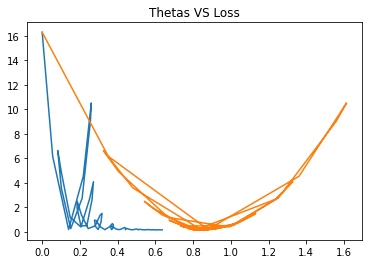

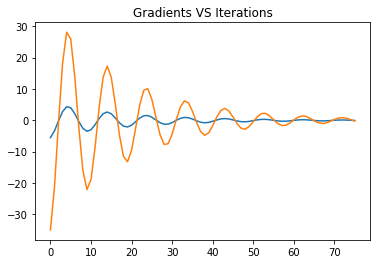

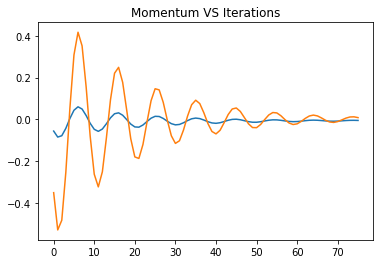

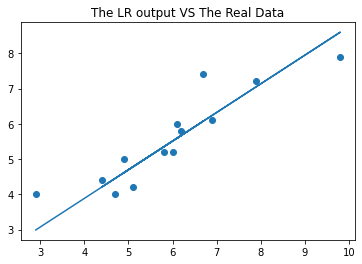

> The accuracy = 0.7918203012977303


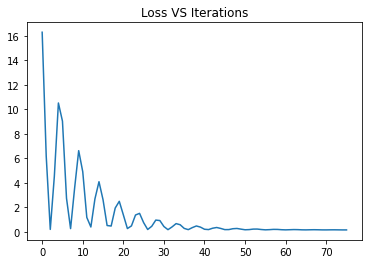

In [8]:
# Momentum-Based Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# batch GD, single variable.


# data
data= np.genfromtxt("RegData.csv", delimiter= ",")
x= data[:,0]
y= data[:,1]
   
def GD(x, y, alpha, gama, iterations):
    
    # initials
    theta0, theta1 = 0, 0
    vt0, vt1 = 0, 0
    m= len(x)
    thetas0, thetas1, loss, grth0, grth1, momentum0, momentum1= [], [], [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # batch looping to the optimum
    for i in range (iterations):
        
        # hypothesis, loss and gradient
        hypo_b= theta0 + theta1*x
        j= ((hypo_b-y).dot(hypo_b-y))/(2*m)
        gr_theta0= np.sum(hypo_b-y)/m
        gr_theta1= np.sum((hypo_b-y)*x)/m 
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss.append(j)
        grth0.append(gr_theta0)
        grth1.append(gr_theta1)
        
        # momentum calculation
        vt0= gama*vt0 + alpha*gr_theta0
        vt1= gama*vt1 + alpha*gr_theta1

        # variables updates
        theta0 -= vt0
        theta1 -= vt1
        
        # documentation of the momentum
        momentum0.append(vt0)
        momentum1.append(vt1)

        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i >= 1:

            if np.absolute(loss[-1] - loss[-2]) < 0.001:
                flag="> loss change stop-condition is satisfied"
                break
                
            if np.linalg.norm([grth0[-1], grth1[-1]]) < (0.00000001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            thetaCurr= np.array([thetas0[-1], thetas1[-1]])
            thetaPrev= np.array([thetas0[-2], thetas1[-2]])
            if np.linalg.norm(thetaCurr - thetaPrev) < 0.000000001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0)
    plt.plot(grth1)
    plt.title("Gradients VS Iterations")
    plt.show()
    plt.plot(momentum0)
    plt.plot(momentum1)
    plt.title("Momentum VS Iterations")
    plt.show()
    plt.scatter(x,y)
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2)
    
GD(x, y, 0.01, 0.9, 1000)

#### Batch/Vanilla Nesterov Accelerated Gradient Descent (NAG) $\;\;\;\;\;\;\;\;\;\;$ (single variable function)

> theta0= 0.5582828732245051 
> theta1= 0.8182981204683655
> the optimization process stopped after implementing number of iterations/updates = 120
> loss change stop-condition is satisfied


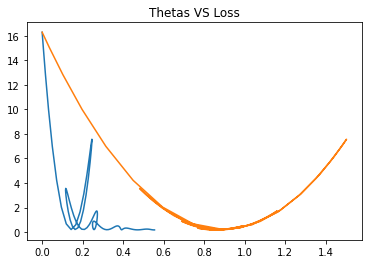

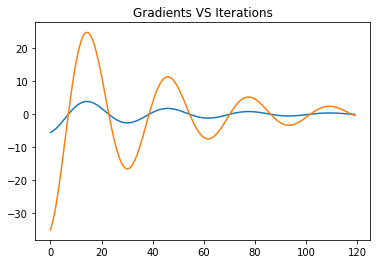

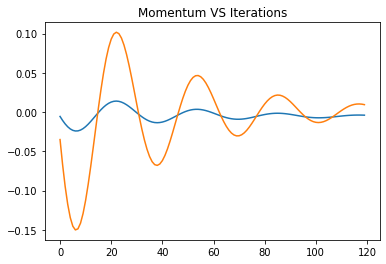

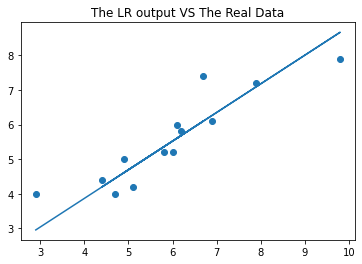

> The accuracy = 0.7863981341098072


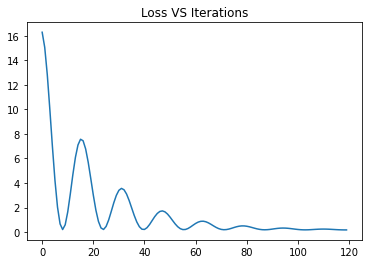

In [9]:
# Nesterov Accelerated Gradient Descent (NAG) optimization of the cost function (MSE), in a Linear Regression problem.
# batch GD, single variable.


# data
data= np.genfromtxt("RegData.csv", delimiter= ",")
x= data[:,0]
y= data[:,1]
   
def GD(x, y, alpha, gama, iterations):
    
    # initials
    theta0, theta1 = 0, 0
    vt0, vt1 = 0, 0
    m= len(x)
    thetas0, thetas1, loss, grth0t, grth1t, momentum0, momentum1= [], [], [], [], [], [], []
    flag="> no stop-condition is satisfied"
    
    # batch looping to the optimum
    for i in range (iterations):
        
        # hypothesis, loss and gradient
        hypo_b= theta0 + theta1*x
        j= ((hypo_b-y).dot(hypo_b-y))/(2*m)
        
        theta0t= theta0 - gama*vt0
        theta1t= theta1 - gama*vt1
        hypo_b_t= theta0t + theta1t*x
        gr_theta0t= np.sum(hypo_b_t-y)/m
        gr_theta1t= np.sum((hypo_b_t-y)*x)/m 
        
        # documention of the gradual change in: variables (thetas), loss and gradients
        thetas0.append(theta0)
        thetas1.append(theta1)
        loss.append(j)
        grth0t.append(gr_theta0t)
        grth1t.append(gr_theta1t)

        # variables updates
        theta0 = theta0t - alpha*gr_theta0t
        theta1 = theta1t - alpha*gr_theta1t
        
        # momentum calculation
        vt0= gama*vt0 + alpha*gr_theta0t
        vt1= gama*vt1 + alpha*gr_theta1t
        
        # documentation of the momentum
        momentum0.append(vt0)
        momentum1.append(vt1)

        # convergance criteria (thresholds for: loss, gradient and theta vector norm)
        if i >= 1:

            if np.absolute(loss[-1] - loss[-2]) < 0.001:
                flag="> loss change stop-condition is satisfied"
                break
                
            if np.linalg.norm([grth0t[-1], grth1t[-1]]) < (0.00000001/alpha):
                flag="> gradient value stop-condition is satisfied"
                break

            thetaCurr= np.array([thetas0[-1], thetas1[-1]])
            thetaPrev= np.array([thetas0[-2], thetas1[-2]])
            if np.linalg.norm(thetaCurr - thetaPrev) < 0.000000001:
            #if np.absolute(np.linalg.norm([thetaCurr]) - np.linalg.norm([thetaPrev])) < 0.001:
                flag="> theta change stop-condition is satisfied"
                break

    # outputs: optimum variables, plots and accuracy
    print("> theta0=", theta0, "\n> theta1=", theta1)
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas0, loss)
    plt.plot(thetas1, loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(grth0t)
    plt.plot(grth1t)
    plt.title("Gradients VS Iterations")
    plt.show()
    plt.plot(momentum0)
    plt.plot(momentum1)
    plt.title("Momentum VS Iterations")
    plt.show()
    plt.scatter(x,y)
    plt.plot(x, hypo_b)
    plt.title("The LR output VS The Real Data")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(y, hypo_b)
    print("> The accuracy =", r2)
    
GD(x, y, 0.001, 0.99, 1000)

#### Batch/Vanilla ADAM Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (multivariant function)

> The 4 thetas=
 [0.67554427] 
 [0.6755004] 
 [0.67548559] 
 [0.6757937]
> the optimization process stopped after implementing number of iterations/updates = 68
> 'loss change' stop-condition is satisfied.


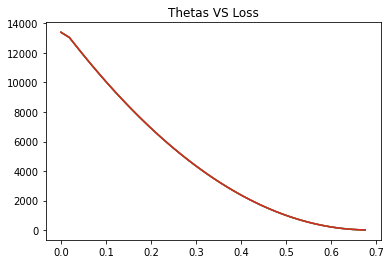

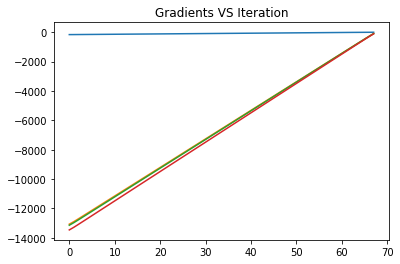

> The accuracy = 0.9756040774814353 , considering the accuracy requirement is to be at least 90%.


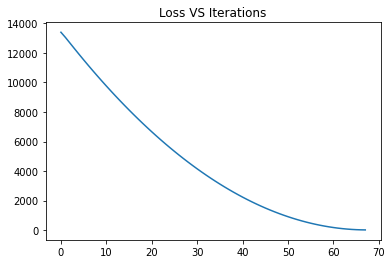

In [10]:
# Batch/Vanilla Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# Multivariant
# Adam approach


# data
data= np.genfromtxt("MultipleLR.csv", delimiter= ",")
features= np.concatenate((np.ones((len(data), 1)), data[:,:-1]), axis=1)
target= data[:,-1].reshape(len(features), 1)

def GD_Multi(features, target, alpha, iterations, beta_1, beta_2):
    
    # initials
    m= len(features)
    thetas_List= np.zeros((features.shape[1], 1))
    thetas= np.zeros((features.shape[1], 1))
    loss= []
    flag="> no stop-condition is satisfied."
    mt, vt= np.zeros((features.shape[1],1)), np.zeros((features.shape[1],1))
    e= 0.0000001

    # batch looping to the optimum.
    for i in range (iterations):
        
        # hypothesis, loss and gradient.
        hypo_b_Mult= features.dot(thetas_List)  #25x1 matrix
        loss_= ((np.dot((hypo_b_Mult-target).T, (hypo_b_Mult-target)))/(2*m))[0,0]

        gradients_List= ((features.T).dot(hypo_b_Mult-target))/m

        # variables updates.
        mt= beta_1*mt + (1-beta_1)*gradients_List
        vt= beta_2*vt + (1-beta_2)*(gradients_List**2)
        thetas_List-= mt*alpha/(np.sqrt(vt+e))
        
        # documention of the gradual change in: variables (thetas), loss and gradients.
        if i > 0:
            thetas= np.concatenate((thetas, thetas_List), axis=1)                
        loss.append(loss_)
        if i==0:
            gradients= gradients_List
        else:
            gradients= np.concatenate((gradients, gradients_List), axis=1)
        
        # convergance criteria (thresholds for: loss, gradient and theta vector norm).
        if i > 1:

            if np.absolute(loss[-1] - loss[-2]) < 10:  
                flag="> 'loss change' stop-condition is satisfied."
                break
                
            if np.linalg.norm([gradients[:, -1]]) < (0.001):
                flag="> gradient value stop-condition is satisfied."
                break

            if np.linalg.norm(thetas[:, -1] - thetas[:, -2]) < 0.001:
                flag="> 'theta update' stop-condition is satisfied."
                break

    # outputs: optimum variables, plots and accuracy.
    print("> The 4 thetas=\n", thetas_List[0], "\n", thetas_List[1], "\n", thetas_List[2], "\n", thetas_List[3])
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas[0,:], loss)
    plt.plot(thetas[1,:], loss)
    plt.plot(thetas[2,:], loss)
    plt.plot(thetas[3,:], loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(gradients[0,:])
    plt.plot(gradients[1,:])
    plt.plot(gradients[2,:])
    plt.plot(gradients[3,:])
    plt.title("Gradients VS Iteration")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    r2= r2_score(target, hypo_b_Mult)
    print("> The accuracy =", r2, ", considering the accuracy requirement is to be at least 90%.")
    
GD_Multi(features, target, 0.01, 1000, 0.2, 0.2)

#### Mini-Batch ADAM Gradient Descent $\;\;\;\;\;\;\;\;\;\;$ (multivariant function)

> The 4 thetas=
 [0.67070823] 
 [0.66617213] 
 [0.65952308] 
 [0.66449447]
> the optimization process stopped after implementing number of iterations/updates = 76
> 'loss change' stop-condition is satisfied.


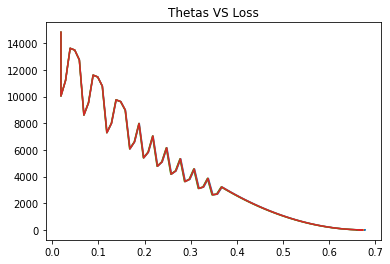

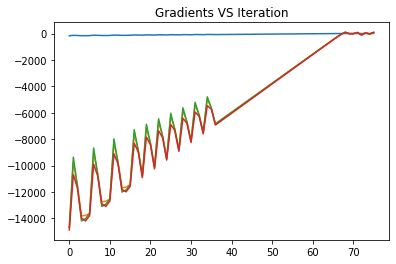

> The accuracy = 0.9695247390764239 , considering the accuracy requirement is to be at least 90%.


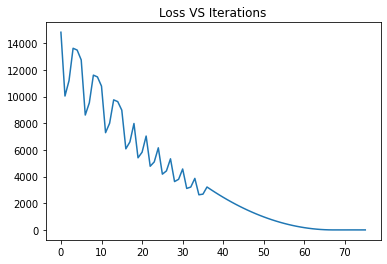

In [11]:
# Mini-Batch Gradient Descent optimization of the cost function (MSE), in a Linear Regression problem.
# Multivariant
# Adam approach


# data
data= np.genfromtxt("MultipleLR.csv", delimiter= ",")
features= np.concatenate((np.ones((len(data), 1)), data[:,:-1]), axis=1) # mxp > p: is the number of columns in the feature matrix.
target= data[:,-1].reshape(len(features), 1)

def GD_Multi(features, target, alpha, epochs, n, beta_1, beta_2): # n is the number of records per a mini_batch.
    
    # initials
    m= len(features)
    thetas_List= np.zeros((features.shape[1], 1))
    loss= []
    flag="> no stop-condition is satisfied."
    mt, vt= np.zeros((features.shape[1],1)), np.zeros((features.shape[1],1))
    e= 0.0000001

    # batch looping to the optimum.
    for i in range (epochs):
        
        for j in range (int(len(features)/n)):
        
            # hypothesis, loss and gradient.
            hypo_b_Mult= (features[int(j*n):int((j+1)*n),:]).dot(thetas_List)  # nx1 matrix
            loss_= ((np.dot((hypo_b_Mult-target[int(j*n):int((j+1)*n),:]).T, (hypo_b_Mult-target[int(j*n):int((j+1)*n),:])))/(2*n))[0,0]
            gradients_List= (np.dot((features[int(j*n):int((j+1)*n),:].T), (hypo_b_Mult-target[int(j*n):int((j+1)*n),:])))/n # px1

            # variables updates.
            mt= beta_1*mt + (1-beta_1)*gradients_List
            vt= beta_2*vt + (1-beta_2)*(gradients_List**2)
            thetas_List-= mt*alpha/(np.sqrt(vt+e))

            # documention of the gradual change in: variables (thetas), loss and gradients.
            if (i == 0) and (j == 0):
                thetas= thetas_List
            else:
                thetas= np.concatenate((thetas, thetas_List), axis=1)                  
            loss.append(loss_)
            if (i == 0) and (j == 0):
                gradients= gradients_List
            else:
                gradients= np.concatenate((gradients, gradients_List), axis=1)

            # convergance criteria (thresholds for: loss, gradient and theta vector norm).
            if i > 1:

                if np.absolute(loss[-1] - loss[-2]) < 600:  
                    flag="> 'loss change' stop-condition is satisfied."
                    break

                if np.linalg.norm([gradients[:, -1]]) < (0.001):
                    flag="> gradient value stop-condition is satisfied."
                    break

                if np.linalg.norm(thetas[:, -1] - thetas[:, -2]) < 0.001:
                    flag="> 'theta update' stop-condition is satisfied."
                    break

    # outputs: optimum variables, plots and accuracy.
    print("> The 4 thetas=\n", thetas_List[0], "\n", thetas_List[1], "\n", thetas_List[2], "\n", thetas_List[3])
    print("> the optimization process stopped after implementing number of iterations/updates =", len(loss))
    print(flag)
    plt.plot(thetas[0,:], loss)
    plt.plot(thetas[1,:], loss)
    plt.plot(thetas[2,:], loss)
    plt.plot(thetas[3,:], loss)
    plt.title("Thetas VS Loss")
    plt.show()
    plt.plot(gradients[0,:])
    plt.plot(gradients[1,:])
    plt.plot(gradients[2,:])
    plt.plot(gradients[3,:])
    plt.title("Gradients VS Iteration")
    plt.show()
    plt.plot(loss)
    plt.title("Loss VS Iterations")
    from sklearn.metrics import r2_score
    hypo_b_Mult_general= features.dot(thetas_List)
    r2= r2_score(target, hypo_b_Mult_general)
    print("> The accuracy =", r2, ", considering the accuracy requirement is to be at least 90%.")
    
GD_Multi(features, target, 0.01, 50, 5, 0.2, 0.2)

# End